In [1]:
import requests
from pprint import pprint
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import linregress

In [2]:
# tip 2: print the type of the response
#type(response)

In [3]:
# tip 3: print the keys of a dictionary
#response.keys()

# Bank Asset Data

In [4]:
five_bank_asset_url="https://banks.data.fdic.gov/api/financials?filters=CERT%3A628%20OR%20CERT%3A3510%20OR%20CERT%3A3511%20OR%20CERT%3A33124%20OR%20CERT%3A7213%20OR%20CERT%3A59017&fields=CERT%2CREPDTE%2CASSET%2CCHBAL%2CSC%2CFREPO%2CLNLSNET%2CLNRE%2CTRADE%2CBKPREM%2CORE%2CINTAN%2CAOA%2CNAME&sort_by=REPDTE&sort_order=DESC&limit=264&offset=0&agg_limit=1&format=json&download=false&filename=data_file"

In [73]:
bank_asset= requests.get(five_bank_asset_url).json()
#pprint(bank_asset)

In [6]:
# tip 2: print the type of the response
type(bank_asset)

dict

In [7]:
# tip 3: print the keys of a dictionary
bank_asset.keys()

dict_keys(['meta', 'data', 'totals'])

In [8]:
#Create a list to hold the data of each financial asset
Combined_assetdata=[]

#loop through the data details of the dictionary 
for asset in bank_asset['data']:
        Date = asset['data']["REPDTE"]
        Total_asset=asset['data']["ASSET"]
        Bank_Certificate=asset['data']["CERT"]
        Bank_Name=asset['data']["NAME"]
        Cash_Balances_due_Depo_In=asset['data']["CHBAL"]
        Securities=asset['data']["SC"]
        Federal_Funds_Sold_Reverse_repurchase=asset['data']["FREPO"]
        Net_Loans_Leases=asset['data']["LNLSNET"]
        Real_Estate_loan=asset['data']["LNRE"]
        Bankpremises_fixedasset=asset['data']["BKPREM"]
        Other_real_estate_owned=asset['data']["ORE"]
        Goodwill_otherIntangibles=asset['data']["INTAN"]
        All_Other_Assets=asset['data']["AOA"]
        
        
        Combined_assetdata.append({"Reporting Date": Date,
                                   "Bank Name":Bank_Name,
                                   "Bank Certificate #": Bank_Certificate,
                                   "Total Asset": Total_asset,
                                  "Cash and Balances due from Depository Institutions": Cash_Balances_due_Depo_In,
                                  "Securities": Securities,
                                   "Federal Funds Sold & Reverse Repurchase Agreements":Federal_Funds_Sold_Reverse_repurchase,
                                  "Net Loans Lease":Net_Loans_Leases,
                                  "All Real Estate Loans":Real_Estate_loan,
                                   "Bank Premises and Fixed Assets":Bankpremises_fixedasset,
                                  "Other Real Estate Owned":Other_real_estate_owned,
                                   "Goodwill and Other Intangibles":Goodwill_otherIntangibles,
                                  "All Other Asset":All_Other_Assets
                                  })
     

In [9]:
new_data = pd.DataFrame(Combined_assetdata)
#new_data

new_bank_asset= new_data.sort_values(by="Reporting Date",ascending=True).reset_index(drop=True)
#new_bank_asset

##Part 1: a) Create stack stacked bar chart, b) liquidity ration, 3)Pie chart analysis of current asset vs. non-current
 

In [74]:
#Total assets=  Cash and balances due from depository institutions + securities+ Net Loans and leases + Other Real Estates Owned+ Goodwill and other Intangibles
#Current asset = Cash and balances due from depository institutions + securities
#create dataframe of each bank of the current asset vs. total asset
new_bank_asset["Current Asset"]=new_bank_asset["Cash and Balances due from Depository Institutions"]+new_bank_asset["Securities"]
new_bank_asset["Curret Asset Ratio"]=new_bank_asset["Current Asset"]/new_bank_asset["Total Asset"]


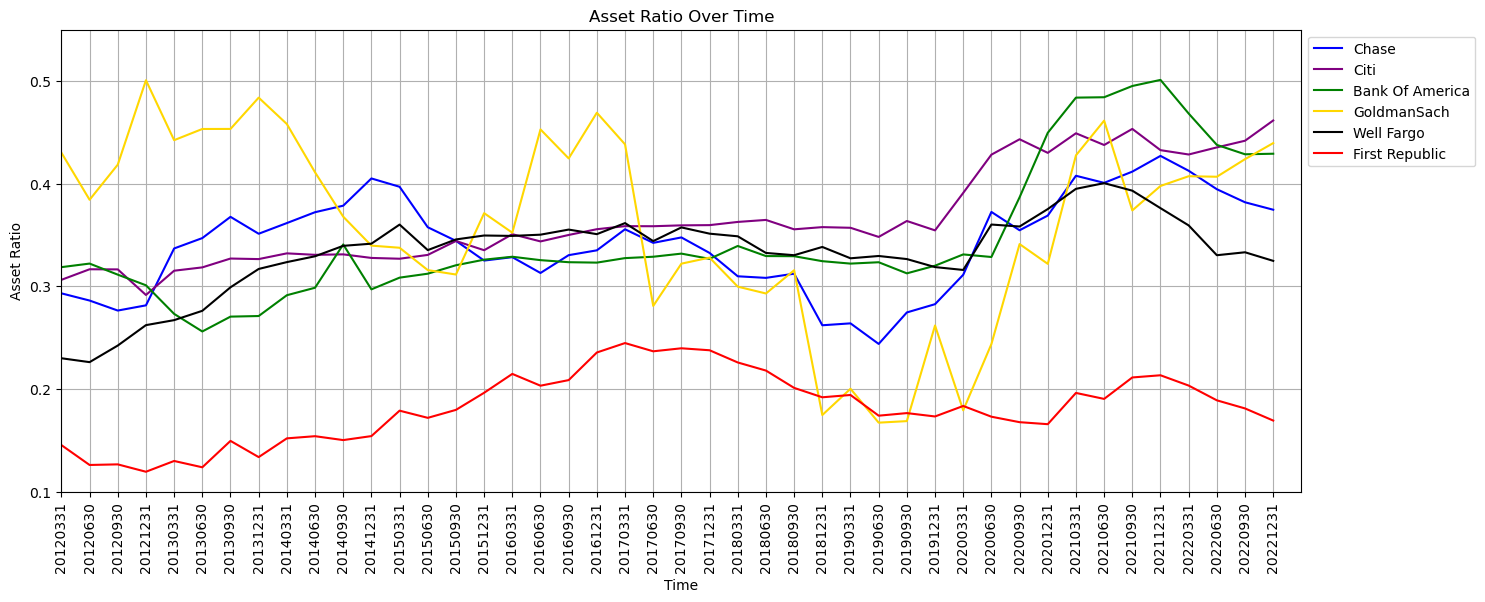

In [11]:
#Plot current asset ratio over time for the six banks, time=np.arange(1,len(new_bank_asset["Reporting Date"].unique())+1,1)
plt.figure(figsize=(16,6))
x_axis = np.arange(len(new_bank_asset["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

#time
Chase,=plt.plot(x_axis,new_bank_asset.loc[(new_bank_asset["Bank Name"]=="JPMORGAN CHASE BANK NA"),"Curret Asset Ratio"], color="blue", label="Chase")
Citi,=plt.plot(x_axis,new_bank_asset.loc[(new_bank_asset["Bank Name"]=="CITIBANK NATIONAL ASSN"),"Curret Asset Ratio"], color="purple", label="Citi")
BOA, = plt.plot(x_axis, new_bank_asset.loc[(new_bank_asset["Bank Name"]=="BANK OF AMERICA NA"),"Curret Asset Ratio"], color="green", label="Bank Of America")
GoldmanSachs,=plt.plot(x_axis, new_bank_asset.loc[(new_bank_asset["Bank Name"]=="GOLDMAN SACHS BANK USA"),"Curret Asset Ratio"], color="gold", label="GoldmanSach")
Wells_Fargo,=plt.plot(x_axis, new_bank_asset.loc[(new_bank_asset["Bank Name"]=="WELLS FARGO BANK NA"),"Curret Asset Ratio"], color="black", label="Well Fargo")
First_republic,=plt.plot(x_axis, new_bank_asset.loc[(new_bank_asset["Bank Name"]=="FIRST REPUBLIC BANK"),"Curret Asset Ratio"], color="red", label="First Republic")
plt.xticks(tick_locations, new_bank_asset["Reporting Date"].unique(), rotation="vertical")
 
# Add labels to X and Y axes :: Add title
plt.title("Asset Ratio Over Time")
plt.xlabel("Time")
plt.ylabel("Asset Ratio")

# Add limits to x axis and y-axis
plt.xlim(0,44)
plt.ylim(0.1,0.55)

# Create a legend for the chart
plt.legend(bbox_to_anchor= (1, 1))
plt.grid()

# Bank Liabilities

In [25]:


bank_liabilites_url="https://banks.data.fdic.gov/api/financials?filters=CERT%3A628%20OR%20CERT%3A3510%20OR%20CERT%3A3511%20OR%20CERT%3A33124%20OR%20CERT%3A7213%20OR%20CERT%3A59017&fields=CERT%2CREPDTE%2CDEP%2CDEPDOM%2CDEPFOR%2CFREPP%2CTRADEL%2COTHBRF%2CALLOTHL%2CEQTOT%2CNAME%2CLIABEQ%2CLIAB&sort_by=REPDTE&sort_order=DESC&limit=264&offset=0&agg_limit=1&format=json&download=false&filename=data_file"

In [75]:
Bank_liabilites= requests.get(bank_liabilites_url).json()
#pprint(Bank_liabilites)

In [27]:
#Create a list to hold the data of each financial asset
Combined_liabilitesdata=[]

for liab in Bank_liabilites['data']:
        Date = liab['data']["REPDTE"]
        Bank_Certificate=liab['data']["CERT"]
        Bank_Name=liab['data']["NAME"]
        Total_liabilites_and_capitals=liab['data']["LIABEQ"]
        Total_liabilities=liab['data']["LIAB"]
        Total_Deposit=liab['data']["DEP"]
        Deposits_in_Domestic_Offices=liab['data']["DEPDOM"]
        Deposits_in_Foreign_Offices=liab['data']["DEPFOR"]
        All_other_liabilities=liab['data']["ALLOTHL"]
        Total_Equity_Capital=liab['data']["EQTOT"]
        Federal_funds_purchased_repurchase=liab['data']["FREPP"]
        Trading_Liabilities=liab['data']["TRADEL"]
        Other_borrowed_funds=liab['data']["OTHBRF"]
        
        
        
        
        
        Combined_liabilitesdata.append({"Reporting Date": Date,
                                   "Bank Name":Bank_Name,
                                   "Bank Certificate #": Bank_Certificate,
                                   "Total Liabilites and capitals": Total_liabilites_and_capitals,
                                   "Total Liabilites":Total_liabilities,
                                   "Total Deposit": Total_Deposit,
                                   "Total Domestic Deposit":Deposits_in_Domestic_Offices,
                                   "Total Foreign Deposit":Deposits_in_Foreign_Offices,
                                   "All other Liabilities":All_other_liabilities,
                                   "Total EquityCapital":Total_Equity_Capital,
                                   "Federal funds purchased and repurchase agreements":Federal_funds_purchased_repurchase,
                                   "Trading Liabilites": Trading_Liabilities,
                                   "Other borrowed funds": Other_borrowed_funds
                                  })
     

In [ ]:
new_liabilites_data= pd.DataFrame(Combined_liabilitesdata)
#new_data

new_bank_liabilites= new_liabilites_data.sort_values(by="Reporting Date",ascending=True).reset_index(drop=True)
#new_bank_liabilites

In [72]:
#create a stack bar chart with the compositon of the asset.


# Bank Performace 

In [3]:
bank_performance_url="https://banks.data.fdic.gov/api/financials?filters=CERT%3A628%20OR%20CERT%3A3510%20OR%20CERT%3A3511%20OR%20CERT%3A33124%20OR%20CERT%3A7213%20OR%20CERT%3A59017&fields=CERT%2CREPDTE%2CROE%2CROA%2CNIMY%2CEEFFR%2CLNLSNTV%2CLNLSDEPR%2CIDLNCORR%2CDEPDASTR%2CIDT1RWAJR%2CRBC1AAJ%2CNAME&sort_by=REPDTE&sort_order=DESC&limit=264&offset=0&agg_limit=1&format=json&download=false&filename=data_file"

In [4]:
bank_performace=requests.get(bank_performance_url).json()
#pprint(bank_performace)

In [5]:
combined_performance=[]

for perf in bank_performace['data']:
        Date = perf['data']["REPDTE"]
        Bank_Certificate=perf['data']["CERT"]
        Bank_Name=perf['data']["NAME"]
        Net_Interest_Margin=perf['data']["NIMY"]
        Return_on_Assets=perf['data']["ROA"]
        Return_on_Equity=perf['data']["ROE"]
        Efficiency_Ratio=perf['data']["EEFFR"]
        Net_Loans_Leases_to_Assets=perf['data']["LNLSNTV"]
        Net_Loans_Leases_to_Deposits=perf['data']["LNLSNTV"]
        Net_Loans_Leases_to_CoreDeposit=perf['data']["IDLNCORR"]
        Domestic_Deposits_to_Total_Assets=perf['data']["DEPDASTR"]
        Tier_1_Risk_Based_Capital_Ratio=perf['data']["IDT1RWAJR"]
        
        
        combined_performance.append({"Reporting Date": Date,
                                     "Bank Name":Bank_Name,
                                   "Bank Certificate #": Bank_Certificate,
                                    "Net Interest Margin": Net_Interest_Margin,
                                    "Return on Assets": Return_on_Assets,
                                    "Return on Equity": Return_on_Assets,
                                    "Efficiency Ratio": Efficiency_Ratio,
                                    "Net Loans Leases to Assets": Net_Loans_Leases_to_Assets,
                                    "Net Loans Leases to Deposits": Net_Loans_Leases_to_Deposits,
                                    "Net Loans Leases to CoreDeposit": Net_Loans_Leases_to_CoreDeposit,
                                    "Domestic Deposits to Total Assets":Domestic_Deposits_to_Total_Assets,
                                    "Tier 1 Risk Based Capital Ratio": Tier_1_Risk_Based_Capital_Ratio
                                       })
     

In [6]:
new_perf_data= pd.DataFrame(combined_performance)

new_bank_perfor= new_perf_data.sort_values(by="Reporting Date",ascending=True).reset_index(drop=True)
new_bank_perfor.head()

,Reporting Date,Bank Name,Bank Certificate #,Net Interest Margin,Return on Assets,Return on Equity,Efficiency Ratio,Net Loans Leases to Assets,Net Loans Leases to Deposits,Net Loans Leases to CoreDeposit,Domestic Deposits to Total Assets,Tier 1 Risk Based Capital Ratio
0,20120630,CITIBANK NATIONAL ASSN,7213,3.801293,0.910206,0.910206,57.158555,42.58,42.58,184.903162,28.65,15.240706
1,20120630,GOLDMAN SACHS BANK USA,33124,0.594831,1.314566,1.314566,29.320988,12.04,12.04,58.566582,46.89,18.345798
2,20120630,BANK OF AMERICA NA,3510,2.657255,0.952095,0.952095,64.680503,48.64,48.64,74.325034,68.62,12.863604
3,20120630,JPMORGAN CHASE BANK NA,628,2.323562,0.683181,0.683181,79.750202,32.78,32.78,75.544175,45.92,9.121593
4,20120630,FIRST REPUBLIC BANK,59017,4.203551,1.285897,1.285897,50.839580,80.79,80.79,107.527984,78.15,13.680957


In [71]:
#create a stack bar chart with the compositon of the asset.


## Net Interest Margin

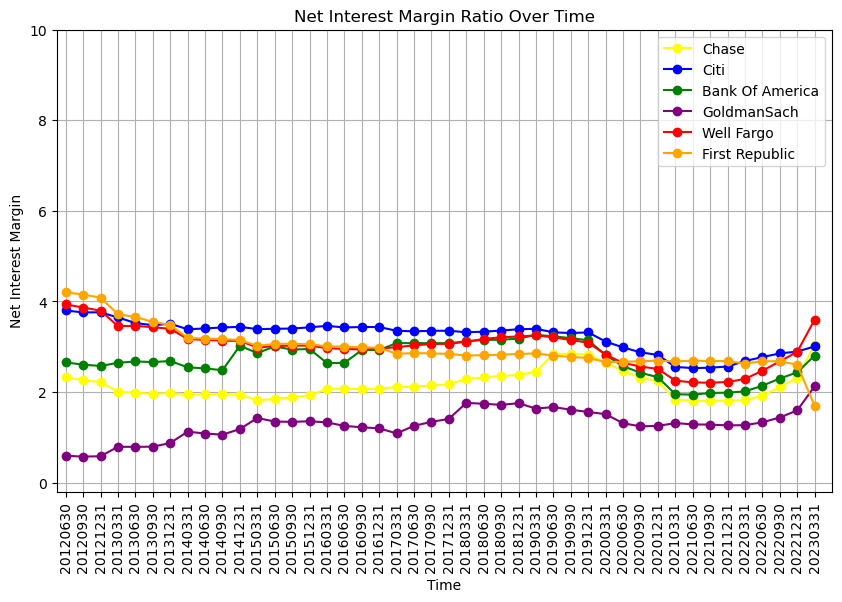

In [8]:
plt.figure(figsize=(10,6))
x_axis = np.arange(len(new_bank_perfor["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

#time
Chase,=plt.plot(x_axis,new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="JPMORGAN CHASE BANK NA"),"Net Interest Margin"], marker ='o' ,color="yellow", label="Chase")
Citi,=plt.plot(x_axis,new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="CITIBANK NATIONAL ASSN"),"Net Interest Margin"], marker ='o', color="blue", label="Citi")
BOA, = plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="BANK OF AMERICA NA"),"Net Interest Margin"], marker = 'o', color="green", label="Bank Of America")
GoldmanSachs,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="GOLDMAN SACHS BANK USA"),"Net Interest Margin"], marker = 'o', color="purple", label="GoldmanSach")
Wells_Fargo,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="WELLS FARGO BANK NA"),"Net Interest Margin"], marker = 'o', color="red", label="Well Fargo")
First_republic,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="FIRST REPUBLIC BANK"),"Net Interest Margin"], marker ='o', color="orange", label="First Republic")
plt.xticks(tick_locations, new_bank_perfor["Reporting Date"].unique(), rotation="vertical")
 
# Add labels to X and Y axes :: Add title
plt.title("Net Interest Margin Ratio Over Time")
plt.xlabel("Time")
plt.ylabel("Net Interest Margin")

# Add limits to x axis and y-axis
plt.xlim(-0.5,44)
plt.ylim(-0.2,10)

# Create a legend for the chart
plt.legend(bbox_to_anchor= (1, 1))
plt.grid()

## Return on Assets

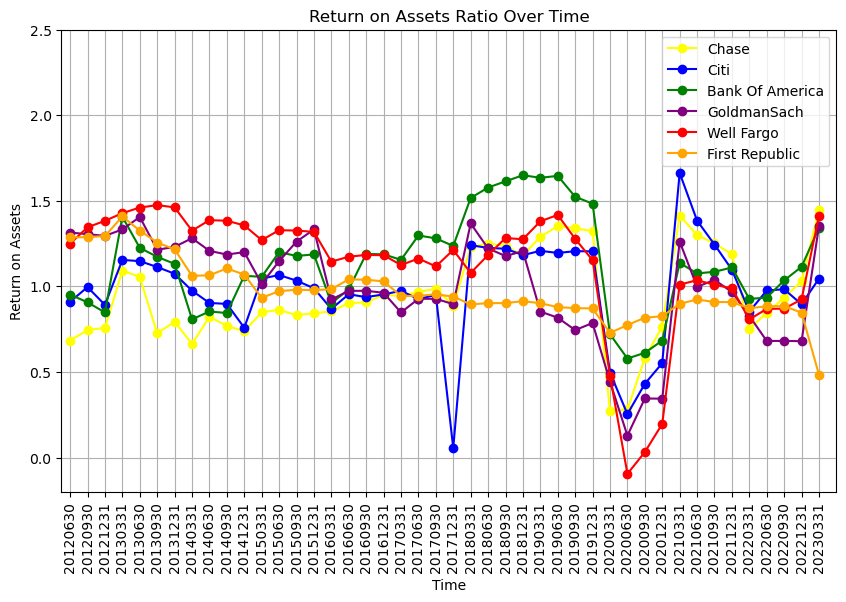

In [16]:
plt.figure(figsize=(10,6))
x_axis = np.arange(len(new_bank_perfor["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

#time
Chase,=plt.plot(x_axis,new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="JPMORGAN CHASE BANK NA"),"Return on Assets"], marker ='o', color="yellow", label="Chase")
Citi,=plt.plot(x_axis,new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="CITIBANK NATIONAL ASSN"),"Return on Assets"], marker ='o', color="blue", label="Citi")
BOA, = plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="BANK OF AMERICA NA"),"Return on Assets"], marker ='o', color="green", label="Bank Of America")
GoldmanSachs,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="GOLDMAN SACHS BANK USA"),"Return on Assets"], marker ='o', color="purple", label="GoldmanSach")
Wells_Fargo,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="WELLS FARGO BANK NA"),"Return on Assets"], marker='o', color="red", label="Well Fargo")
First_republic,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="FIRST REPUBLIC BANK"),"Return on Assets"], marker ='o', color="orange", label="First Republic")
plt.xticks(tick_locations, new_bank_perfor["Reporting Date"].unique(), rotation="vertical")
 
# Add labels to X and Y axes :: Add title
plt.title("Return on Assets Ratio Over Time")
plt.xlabel("Time")
plt.ylabel("Return on Assets")

# Add limits to x axis and y-axis
plt.xlim(-0.5,44)
plt.ylim(-0.2,2.5)

# Create a legend for the chart
plt.legend(bbox_to_anchor= (1, 1))
plt.grid()

## Return on equity 

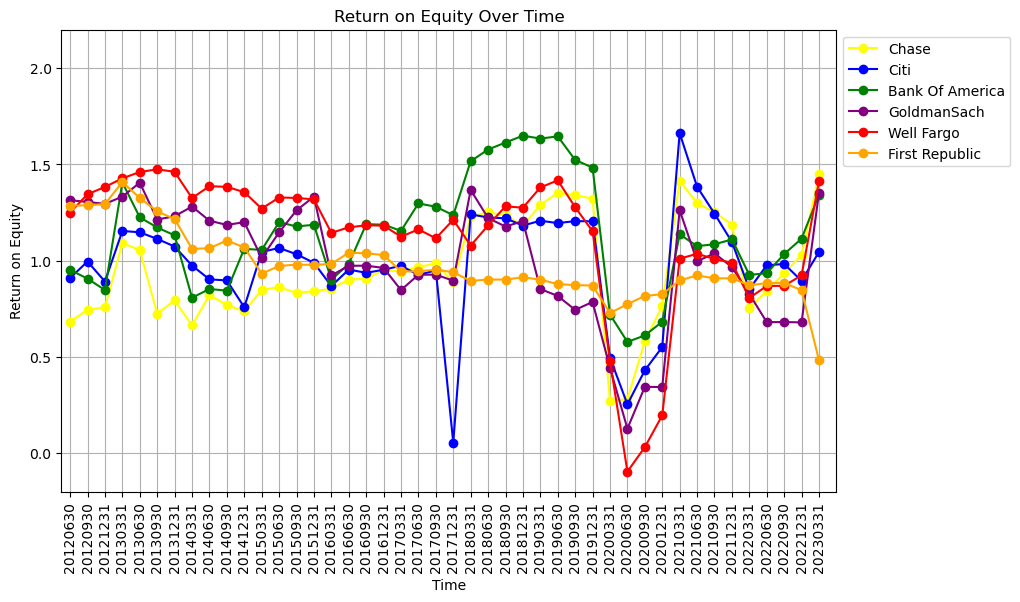

In [22]:

plt.figure(figsize=(10,6))
x_axis = np.arange(len(new_bank_perfor["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

#time
Chase,=plt.plot(x_axis,new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="JPMORGAN CHASE BANK NA"),"Return on Equity"], marker ='o', color="yellow", label="Chase")
Citi,=plt.plot(x_axis,new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="CITIBANK NATIONAL ASSN"),"Return on Equity"], marker = 'o', color="blue", label="Citi")
BOA, = plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="BANK OF AMERICA NA"),"Return on Equity"], marker ='o',color="green", label="Bank Of America")
GoldmanSachs,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="GOLDMAN SACHS BANK USA"),"Return on Equity"], marker ='o', color="purple", label="GoldmanSach")
Wells_Fargo,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="WELLS FARGO BANK NA"),"Return on Equity"], marker ='o', color="red", label="Well Fargo")
First_republic,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="FIRST REPUBLIC BANK"),"Return on Equity"], marker ='o', color="orange", label="First Republic")
plt.xticks(tick_locations, new_bank_perfor["Reporting Date"].unique(), rotation="vertical")
 
# Add labels to X and Y axes :: Add title
plt.title("Return on Equity Over Time")
plt.xlabel("Time")
plt.ylabel("Return on Equity")

# Add limits to x axis and y-axis
plt.xlim(-0.5,44)
plt.ylim(-0.2,2.2)

# Create a legend for the chart
plt.legend(bbox_to_anchor= (1, 1))
plt.grid()

## Efficiency Ratio

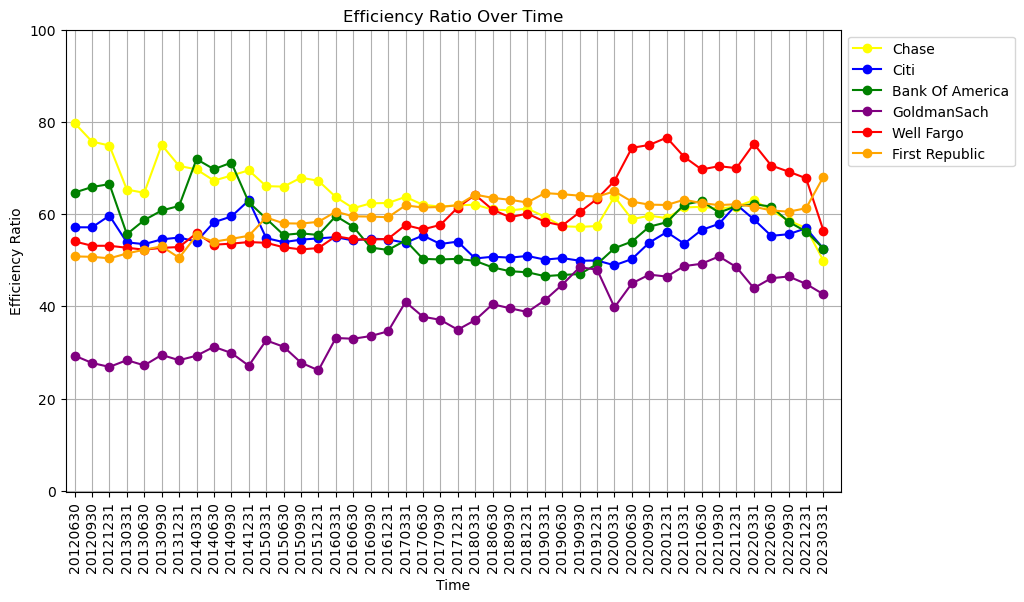

In [23]:
plt.figure(figsize=(10,6))
x_axis = np.arange(len(new_bank_perfor["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

#time
Chase,=plt.plot(x_axis,new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="JPMORGAN CHASE BANK NA"),"Efficiency Ratio"], marker ='o', color="yellow", label="Chase")
Citi,=plt.plot(x_axis,new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="CITIBANK NATIONAL ASSN"),"Efficiency Ratio"], marker = 'o', color="blue", label="Citi")
BOA, = plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="BANK OF AMERICA NA"),"Efficiency Ratio"], marker ='o', color="green", label="Bank Of America")
GoldmanSachs,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="GOLDMAN SACHS BANK USA"),"Efficiency Ratio"],marker ='o', color="purple", label="GoldmanSach")
Wells_Fargo,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="WELLS FARGO BANK NA"),"Efficiency Ratio"], marker ='o', color="red", label="Well Fargo")
First_republic,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="FIRST REPUBLIC BANK"),"Efficiency Ratio"], marker = 'o', color="orange", label="First Republic")
plt.xticks(tick_locations, new_bank_perfor["Reporting Date"].unique(), rotation="vertical")
 
# Add labels to X and Y axes :: Add title
plt.title("Efficiency Ratio Over Time")
plt.xlabel("Time")
plt.ylabel("Efficiency Ratio")

# Add limits to x axis and y-axis
plt.xlim(-0.5,44)
plt.ylim(-0.2,100)

# Create a legend for the chart
plt.legend(bbox_to_anchor= (1, 1))
plt.grid()

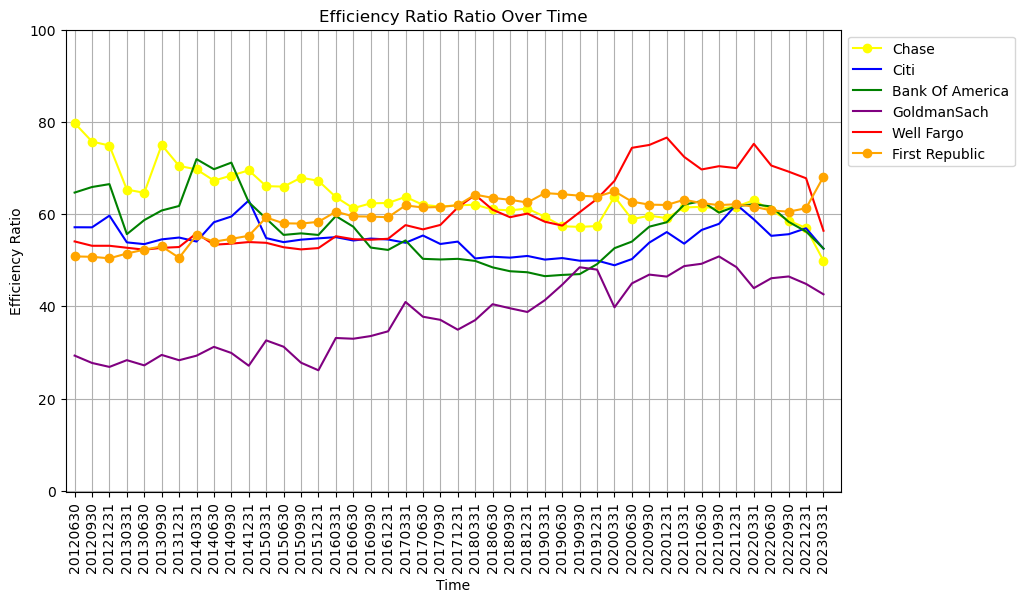

In [21]:
# Graph was analyzed by adding and removing marker

plt.figure(figsize=(10,6))
x_axis = np.arange(len(new_bank_perfor["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

#time
Chase,=plt.plot(x_axis,new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="JPMORGAN CHASE BANK NA"),"Efficiency Ratio"], marker ='o', color="yellow", label="Chase")
Citi,=plt.plot(x_axis,new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="CITIBANK NATIONAL ASSN"),"Efficiency Ratio"], color="blue", label="Citi")
BOA, = plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="BANK OF AMERICA NA"),"Efficiency Ratio"], color="green", label="Bank Of America")
GoldmanSachs,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="GOLDMAN SACHS BANK USA"),"Efficiency Ratio"], color="purple", label="GoldmanSach")
Wells_Fargo,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="WELLS FARGO BANK NA"),"Efficiency Ratio"],color="red", label="Well Fargo")
First_republic,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="FIRST REPUBLIC BANK"),"Efficiency Ratio"], marker ='o', color="orange", label="First Republic")
plt.xticks(tick_locations, new_bank_perfor["Reporting Date"].unique(), rotation="vertical")
 
# Add labels to X and Y axes :: Add title
plt.title("Efficiency Ratio Ratio Over Time")
plt.xlabel("Time")
plt.ylabel("Efficiency Ratio")

# Add limits to x axis and y-axis
plt.xlim(-0.5,44)
plt.ylim(-0.2,100)

# Create a legend for the chart
plt.legend(bbox_to_anchor= (1, 1))
plt.grid()